In [200]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt

In [201]:
plt.style.use('ggplot')

In [202]:
rnd.seed(2023)
n, m = 200, 150 

D = np.diag(1+100*rnd.rand(n))
Q = D

Qr,R = la.qr(rnd.rand(n,n))
A = (Qr.T@D@Qr)[:,:m]
b = rnd.rand(n)

def f1(x):
  return 0.5*la.norm(A@x-b)**2

def grad_f1(x):
  #completar (es la misma del Obligatorio 1)
  return A.T @ (A @ x - b)

xstar_f1 = la.inv(A.T@A)@A.T@b

In [203]:
def rosenbrock(x, b=2):
    x1, x2 = x
    return (1 - x1)**2 + b * (x2 - x1**2)**2

def grad_rosenbrock(x, b=2):
    x1, x2 = x
    return np.array([
        2 * (x1 - 1) - 4 * b * x1 * (x2 - x1**2),
        2 * b * (x2 - x1**2)
    ])

xstar_rosenbrock = np.array([1,1])

In [204]:
# Parte 2.a)
def gradient_descent(grad, x_init, xstar, alpha, tol=1e-5):
    # Implementar el método de descenso por gradiente con paso fijo alpha, comenzando en x_init.
    # grad es la función que implementa el gradiente de la función a optimizar, y xstar el óptimo conocido (esto en general no lo tenemos, pero para las funciones de este obligatorio sabemos los míniomos)
    # La condición de parada debe ser que la norma del gradiente sea menor a la tolerancia establecida (tol)
    # La función debe devolver el punto x alcanzado, la cantidad de iteraciones, un array con toda la trayectoria de los x_k, y un array con las distancias de los x_k al xstar. 
    
    # Para devolver la trayectoria y distancias al óptimo, puede crear listas e ir anexando elementos a medida que transcurren las iteraciones.
    # Las siguientes líneas sirven de ejemplo para esto.
    x = x_init.copy()
    xs, es = [x], [np.linalg.norm(x-xstar)]
    it = 0
    
    # Iteraciones
    while np.linalg.norm(grad(x)) > tol:
        x = x - alpha * grad(x)
        xs.append(x)
        es.append(np.linalg.norm(x-xstar))

        it += 1

        if it >= 500_000:
            break

    return x, it, np.array(xs), np.array(es)

# Parte 2.b)
def nesterov_gradient_descent(grad, x_init, xstar, alpha, tol=1e-5):
    # Implementar el método de Nesterov por gradiente con paso fijo, comenzando en x_init
    # La condición de parada debe ser que la norma del gradiente sea menor a la tolerancia establecida (tol)
    # La función debe devolver el punto x alcanzado, la cantidad de iteraciones, un array con toda la trayectoria de los x_k, y un array con las distancias de los x_k al xstar. 
    
    x, y = x_init.copy(), x_init.copy()
    xs, es = [x], [np.linalg.norm(x - xstar)]
    it = 0
    
    # Iterar hasta que la norma del gradiente sea menor a la tolerancia establecida
    while np.linalg.norm(grad(y)) > tol:
        # Actualizar iterates
        x_next = y - alpha * grad(y)
        y_next = x_next + (it / (it + 3)) * (x_next - x)
        
        # Guardar valores
        x, y = x_next, y_next
        xs.append(x)
        es.append(np.linalg.norm(x - xstar))

        # Incrementar contador de iteraciones
        it += 1
    
    return x, it, np.array(xs), np.array(es)


In [205]:
def print_method_results(method, function, x, it, xs, e):
    print(method)
    #print('x =', x_f1)
    print('\tf(x) =', function['fn'](x))
    print('\t||grad f(x)|| =', la.norm(function['grad'](x)))
    print('\tIteraciones =', it)

In [206]:
# Código inicial para comenzar la parte 2.c). Cambiar el valor del paso alpha.
x_init_rosenbrock = np.array([1.5,2])
ALPHA = 0.0001

# Rosenbrock con GD
x_r_gd, it_r_gd, xs_r_gd, e_r_gd = gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=ALPHA)
print_method_results('Gradient Descent', 
                    {'fn': rosenbrock, 'grad': grad_rosenbrock}, 
                    x_r_gd, it_r_gd, xs_r_gd, e_r_gd)
# Rosenbrock con Nesterov GD
x_r_ngd, it_r_ngd, xs_r_ngd, e_r_ngd = nesterov_gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=ALPHA)
print_method_results('Nesterov Gradient Descent', 
                    {'fn': rosenbrock, 'grad': grad_rosenbrock},
                    x_r_ngd, it_r_ngd, xs_r_ngd, e_r_ngd)

Gradient Descent
	f(x) = 1.3518603636667437e-10
	||grad f(x)|| = 9.99982808170273e-06
	Iteraciones = 301137
Nesterov Gradient Descent
	f(x) = 9.338265734365906e-10
	||grad f(x)|| = 2.6839743283825566e-05
	Iteraciones = 5360


In [207]:
# Para la función ||Ax-b||^2, comenzar desde un punto aleatorio
x_init_f1 = rnd.rand(m)
ALPHA = 0.0001

# ||Ax-b||^2 con GD
x_f1_gd, it_f1_gd, xs_f1_gd, e_f1_gd = gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=ALPHA)
print_method_results('Gradient Descent', 
                    {'fn': f1, 'grad': grad_f1},
                    x_f1_gd, it_f1_gd, xs_f1_gd, e_f1_gd)
# ||Ax-b||^2 con Nesterov GD
x_f1_ngd, it_f1_ngd, xs_f1_ngd, e_f1_ngd = nesterov_gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=ALPHA)
print_method_results('Nesterov Gradient Descent', 
                    {'fn': f1, 'grad': grad_f1},
                    x_f1_ngd, it_f1_ngd, xs_f1_ngd, e_f1_ngd)

Gradient Descent
	f(x) = 10.369041843442155
	||grad f(x)|| = 9.947382441364942e-06
	Iteraciones = 1178
Nesterov Gradient Descent
	f(x) = 10.369041843442202
	||grad f(x)|| = 1.123916802366896e-05
	Iteraciones = 1092


## Pruebas con Alfas

In [208]:
# ALPHA_OPTIMO para f1
# como f1 es convexa alpha_opt = 2 / (M+m) con M=max(valp) y m=min(valp)
# f1 = (1/2)||Ax-b||^2 => H_f1 = A^TA
H_f1 = np.dot(np.transpose(A), A)
valores_propios, _ = np.linalg.eig(H_f1)
min_vp, max_vp = np.min(valores_propios), np.max(valores_propios)
ALPHA_OPT_F1 = 2 / (max_vp + min_vp)

# ese alpha con nesterov no converge
ALPHA_NES_F1 = 1 / max_vp

In [209]:
def prueba_alphas(alphas, method, grad, x_init, xstar):
    ncols = 3
    nrows = len(alphas) // ncols
    if nrows * ncols < len(alphas):
        nrows += 1

    fig, axs = plt.subplots(nrows, ncols, figsize=(20,5), sharex=True, sharey=True)
    for ax, alpha in zip(axs, alphas):
        x, it, xs, es = method(grad, x_init, xstar, alpha=alpha)
        #if es[-1] > 10e5:
        #  ax.get_shared_y_axes().remove(ax)
        ax.plot(range(it+1), es)
        ax.set_yscale('log')
        ax.set_title(fr'$\alpha$ = {alpha:.5g}')
    plt.show()

In [210]:
def estimate_alpha(method, grad_func, x_init, x_star, initial_alpha, improvement_threshold):
    MAX_ERROR_ALLOWED = 10e5
    min_iterations = 500_000
    old_best = None
    best = initial_alpha
    eps = best / 5
    
    while eps > improvement_threshold:
        eps = eps / 10 if old_best == best else eps
        old_best = best
        alphas = [best-eps, best, best+eps]
        for alpha in alphas:
            _, iterations, _, errors = method(grad_func, x_init, x_star, alpha)
            # elegimos el alpha que requiere menos iteraciones
            # pero hay que chequear que no tenga pocas iter debido a que el error sea grande
            if errors[-1] < MAX_ERROR_ALLOWED  and iterations < min_iterations:
                min_iterations = iterations
                best = alpha
        print(f'best={best:.5g}, eps={eps:.5g}, iterations={min_iterations}')
    
    return best, eps

#### F1

<ipython-input-202-1dbba3a55c91>:16: RuntimeWarning: overflow encountered in matmul
  return A.T @ (A @ x - b)
<ipython-input-202-1dbba3a55c91>:16: RuntimeWarning: invalid value encountered in matmul
  return A.T @ (A @ x - b)


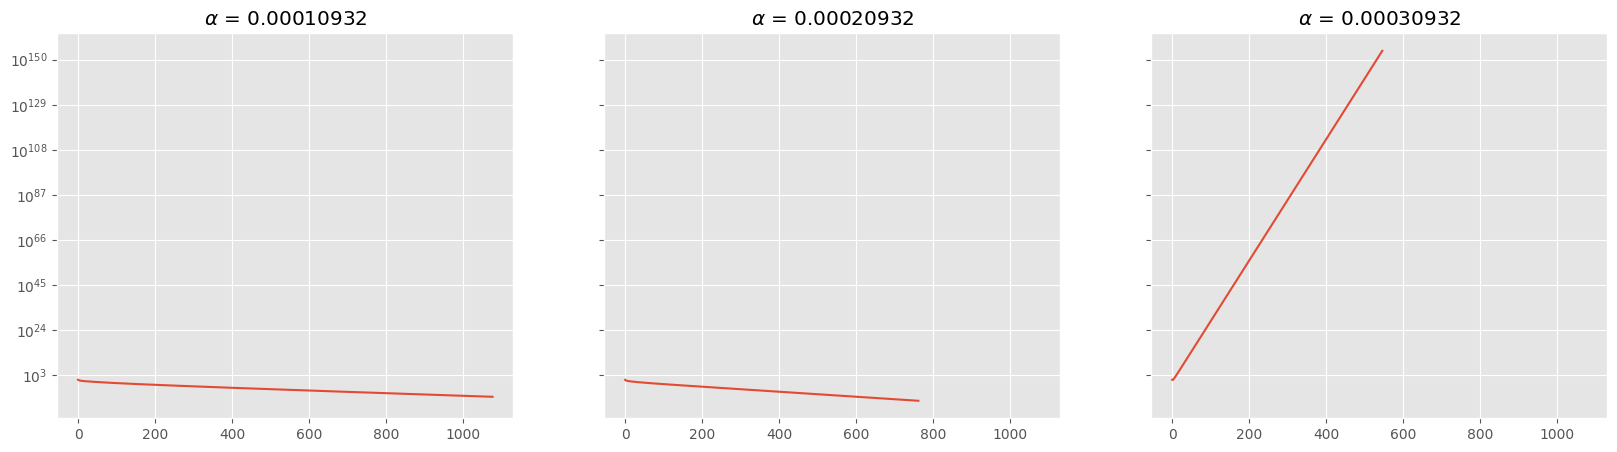

In [211]:
eps = 0.0001
prueba_alphas([ALPHA_OPT_F1-eps, ALPHA_OPT_F1, ALPHA_OPT_F1+eps], gradient_descent, grad_f1, x_init_f1, xstar_f1)

<ipython-input-202-1dbba3a55c91>:16: RuntimeWarning: overflow encountered in matmul
  return A.T @ (A @ x - b)
<ipython-input-202-1dbba3a55c91>:16: RuntimeWarning: invalid value encountered in matmul
  return A.T @ (A @ x - b)


best=0.00016746, eps=4.1864e-05, iterations=701
best=0.00016746, eps=4.1864e-05, iterations=701
best=0.00017164, eps=4.1864e-06, iterations=683


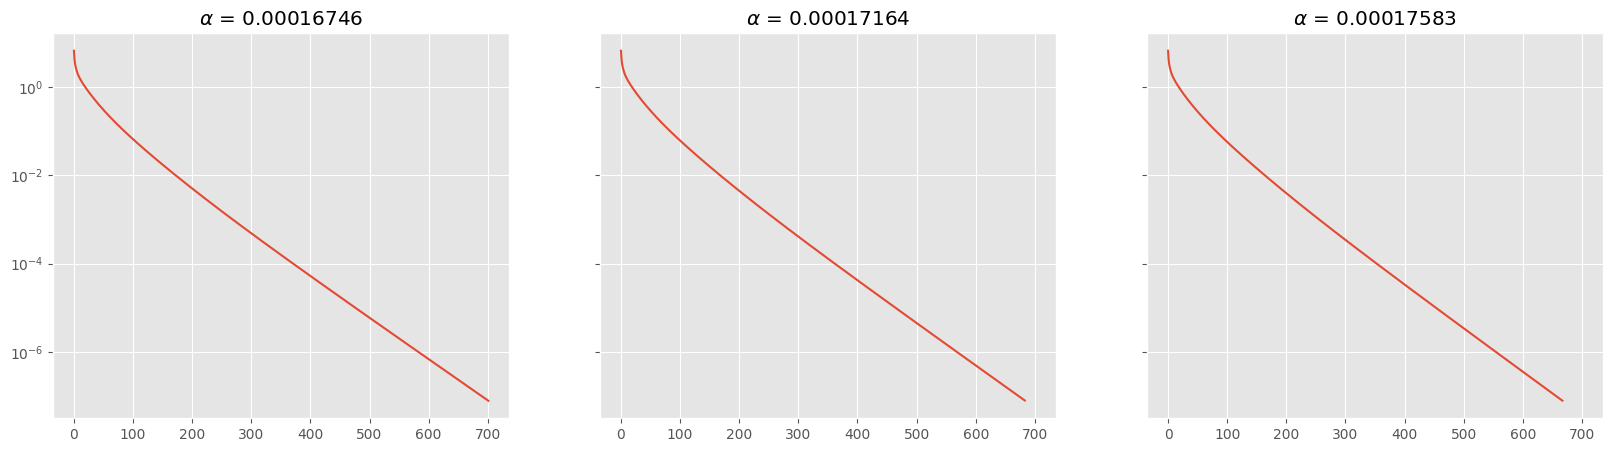

In [212]:
best, eps = estimate_alpha(gradient_descent, grad_f1, x_init_f1, xstar_f1, ALPHA_OPT_F1, 1e-5)
prueba_alphas([best-eps, best, best+eps], gradient_descent, grad_f1, x_init_f1, xstar_f1)

<ipython-input-202-1dbba3a55c91>:16: RuntimeWarning: overflow encountered in matmul
  return A.T @ (A @ x - b)
<ipython-input-202-1dbba3a55c91>:16: RuntimeWarning: invalid value encountered in matmul
  return A.T @ (A @ x - b)


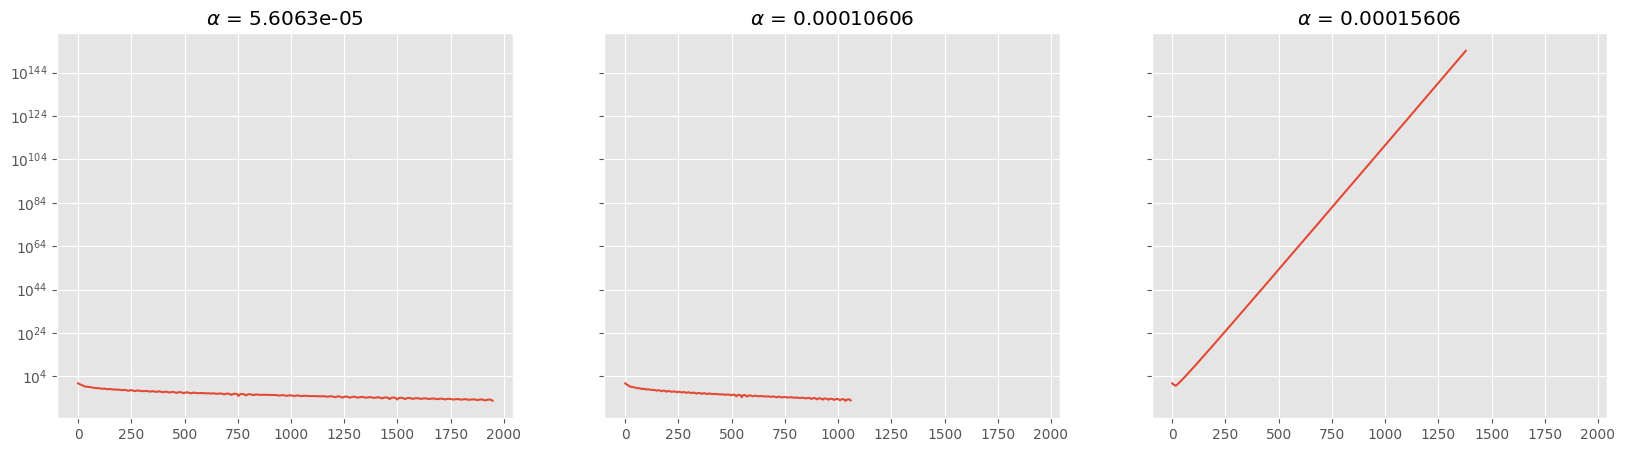

In [213]:
eps = 0.00005
prueba_alphas([ALPHA_NES_F1-eps, ALPHA_NES_F1, ALPHA_NES_F1+eps], nesterov_gradient_descent, grad_f1, x_init_f1, xstar_f1)

best=0.00012728, eps=2.1213e-05, iterations=917


<ipython-input-3-1dbba3a55c91>:16: RuntimeWarning: overflow encountered in matmul
  return A.T @ (A @ x - b)
<ipython-input-3-1dbba3a55c91>:16: RuntimeWarning: invalid value encountered in matmul
  return A.T @ (A @ x - b)


best=0.00012728, eps=2.1213e-05, iterations=917
best=0.0001294, eps=2.1213e-06, iterations=887


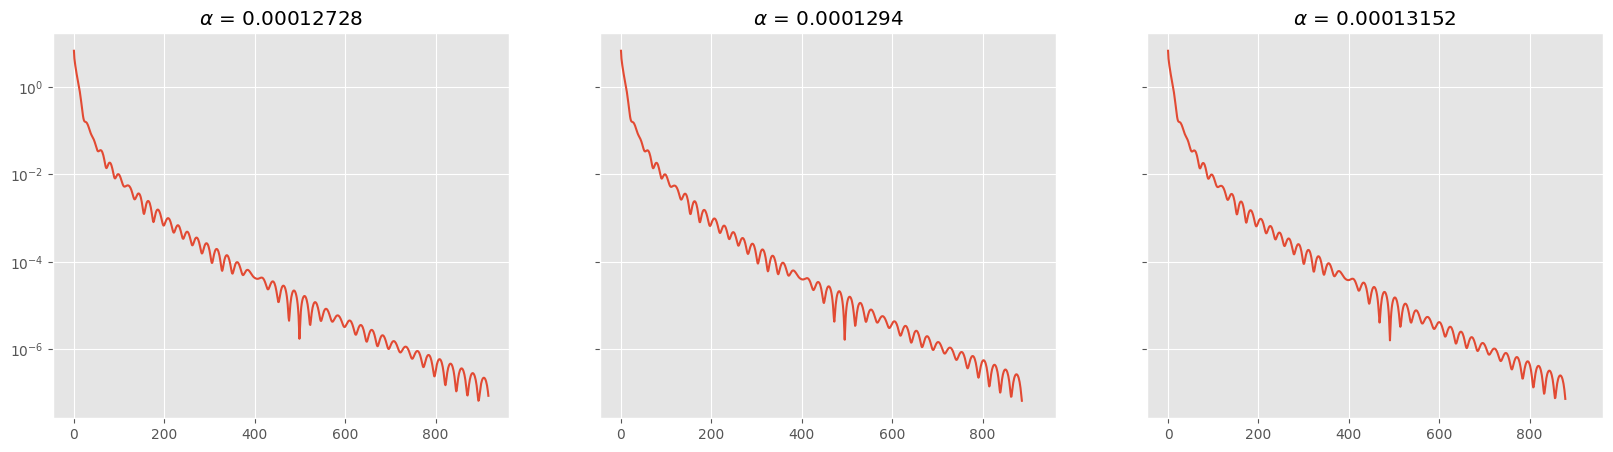

In [ ]:
best, eps = estimate_alpha(nesterov_gradient_descent, grad_f1, x_init_f1, xstar_f1, ALPHA_NES_F1, 1e-5)
prueba_alphas([best-eps, best, best+eps], nesterov_gradient_descent, grad_f1, x_init_f1, xstar_f1)

#### Rosenbrock

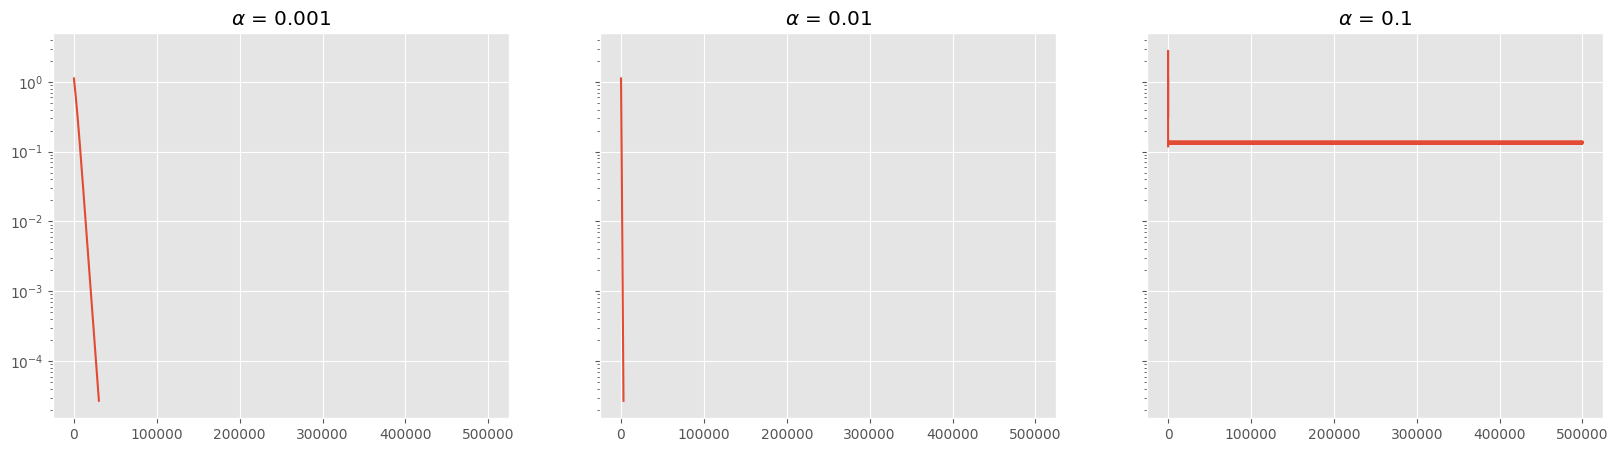

In [214]:
prueba_alphas([1e-3, 1e-2, 1e-1], gradient_descent, grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock)

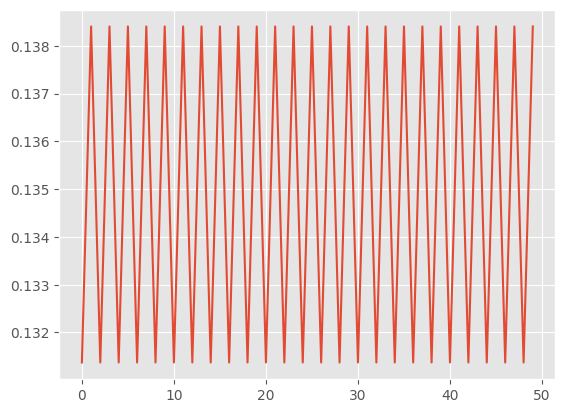

In [ ]:
x,it,xs,es = gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, 0.1)
plt.plot(es[-50:])

En la ultima queda oscilando, alpha=0.1 es lo suficientemente grande como para no permitirle mejorar mas pero tambeien es suficientemente pequeno como para que no diverja

In [ ]:
best, eps = estimate_alpha(gradient_descent, grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, 0.1, 0.0001)

<ipython-input-4-4d91d04d620a>:8: RuntimeWarning: overflow encountered in double_scalars
  2 * (x1 - 1) - 4 * b * x1 * (x2 - x1**2),
<ipython-input-5-e09aebe9ccb8>:16: RuntimeWarning: invalid value encountered in subtract
  x -= alpha * grad(x)


best=0.08, eps=0.02, iterations=312
best=0.08, eps=0.02, iterations=312
best=0.082, eps=0.002, iterations=294
best=0.084, eps=0.002, iterations=268
best=0.086, eps=0.002, iterations=238
best=0.088, eps=0.002, iterations=219
best=0.088, eps=0.002, iterations=219
best=0.0878, eps=0.0002, iterations=154
best=0.0878, eps=0.0002, iterations=154
best=0.08782, eps=2e-05, iterations=113


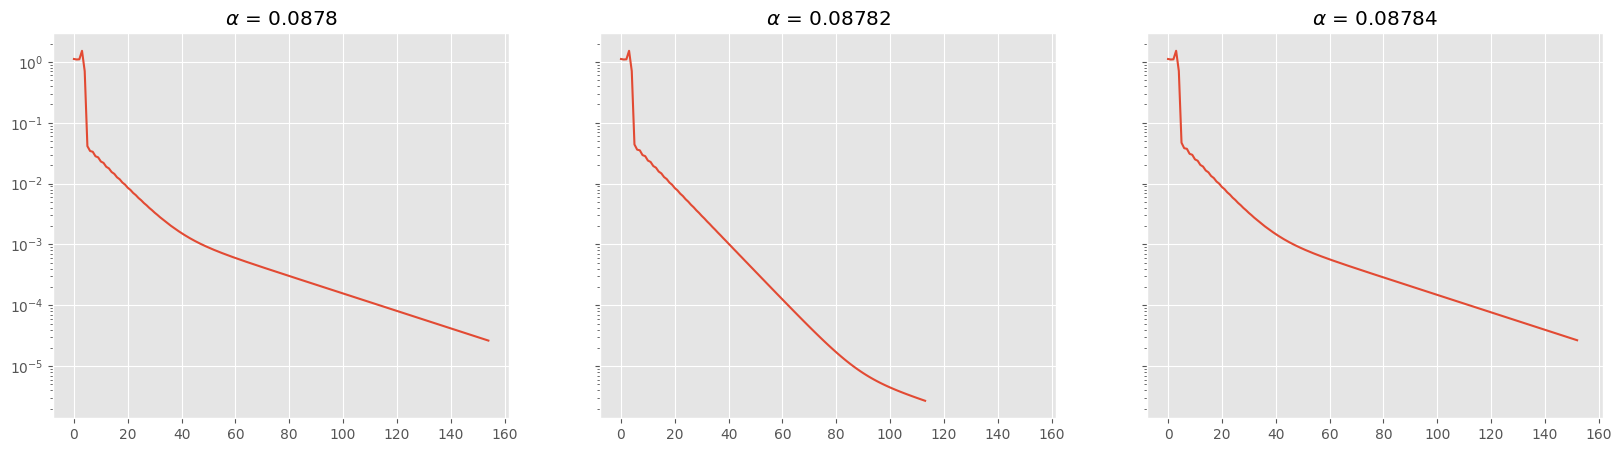

In [ ]:
prueba_alphas([best-eps, best, best+eps], gradient_descent, grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock)

In [ ]:
best, eps = estimate_alpha(nesterov_gradient_descent, grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, 0.05, 1e-5)

best=0.04, eps=0.01, iterations=214
best=0.04, eps=0.01, iterations=214
best=0.04, eps=0.001, iterations=214
best=0.0401, eps=0.0001, iterations=188
best=0.0402, eps=0.0001, iterations=162
best=0.0402, eps=0.0001, iterations=162
best=0.0402, eps=1e-05, iterations=162


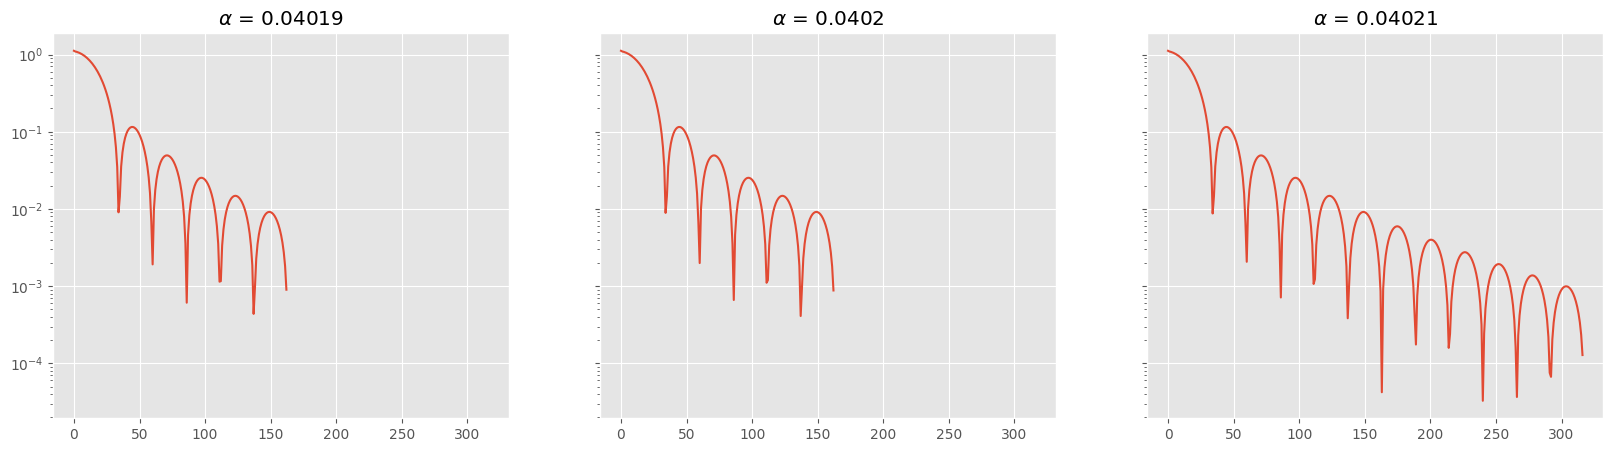

In [ ]:
prueba_alphas([best-eps, best, best+eps], nesterov_gradient_descent, grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock)

### Graficos con el optimo

In [215]:
x_f1_gd, it_f1_gd, xs_f1_gd, e_f1_gd = gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=ALPHA_OPT_F1)
x_f1_ngd, it_f1_ngd, xs_f1_ngd, e_f1_ngd = nesterov_gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=ALPHA_NES_F1)

ALPHA_R_GD=0.08782
ALPHA_R_NES=0.0402
x_r_gd, it_r_gd, xs_r_gd, e_r_gd = gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=ALPHA_R_GD/10)
x_r_ngd, it_r_ngd, xs_r_ngd, e_r_ngd = nesterov_gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=ALPHA_R_NES)

Text(0.5, 0.98, 'Imagen de $x_{k}$ para ambas funciones usando Nesterov GD')

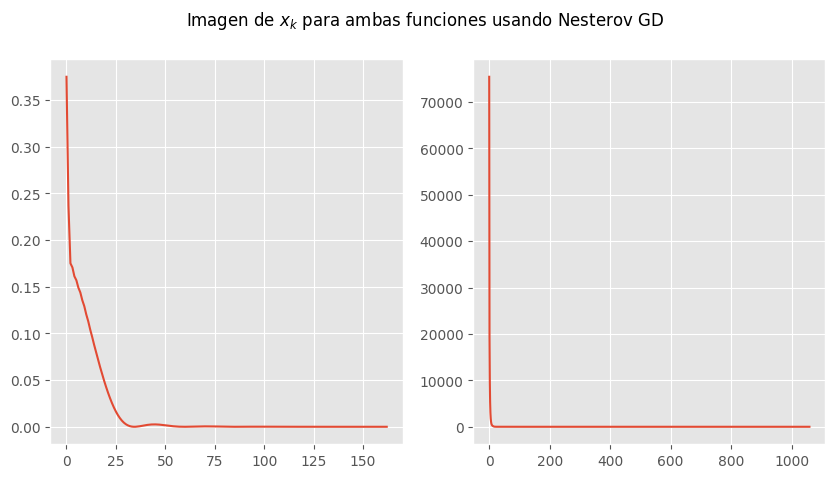

In [216]:
f_xs_r_ngd = [rosenbrock(x) for x in xs_r_ngd]
f_xs_f1_ngd = [f1(x) for x in xs_f1_ngd]
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(f_xs_r_ngd)
ax[1].plot(f_xs_f1_ngd)
plt.suptitle(r'Imagen de $x_{k}$ para ambas funciones usando Nesterov GD')

Text(0.5, 0.98, 'Imagen de $x_{k}$ para ambas funciones usando GD')

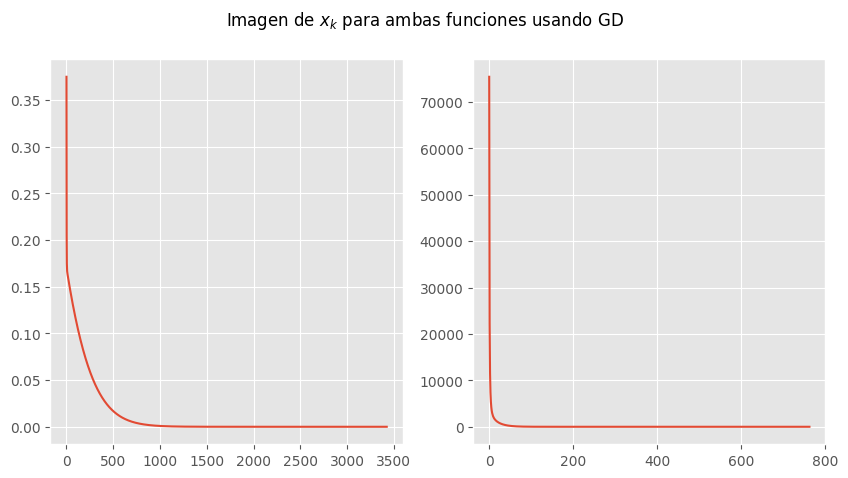

In [217]:
f_xs_r_gd = [rosenbrock(x) for x in xs_r_gd]
f_xs_f1_gd = [f1(x) for x in xs_f1_gd]
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(f_xs_r_gd)
ax[1].plot(f_xs_f1_gd)
plt.suptitle(r'Imagen de $x_{k}$ para ambas funciones usando GD')

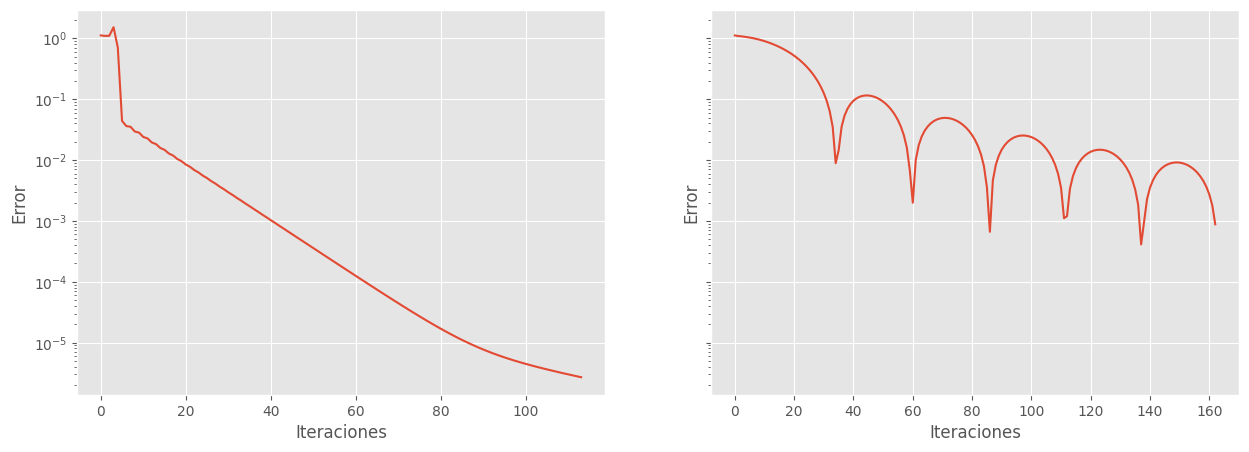

In [ ]:
# Grafique la funcion de error ∥xk −x∗∥ en funcion de las iteraciones. Utilice escala logarıtimica en el eje vertical

# Rosenbrock
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
for a in ax:
    a.set_xlabel('Iteraciones')
    a.set_ylabel('Error')
    a.set_yscale('log')
ax[0].plot(range(it_r_gd+1), e_r_gd, label='Gradient Descent')
ax[1].plot(range(it_r_ngd+1), e_r_ngd, label='Nesterov Gradient Descent')
plt.show()

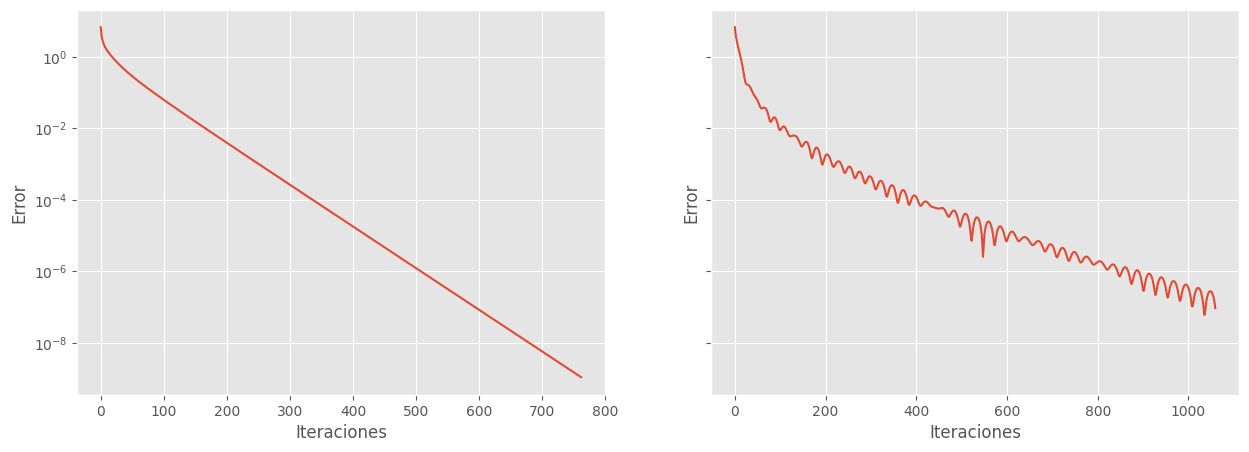

In [ ]:
# ||Ax-b||^2
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
for a in ax:
    a.set_xlabel('Iteraciones')
    a.set_ylabel('Error')
    a.set_yscale('log')
ax[0].plot(range(it_f1_gd+1), e_f1_gd, label='Gradient Descent')
ax[1].plot(range(it_f1_ngd+1), e_f1_ngd, label='Nesterov Gradient Descent')
plt.show()

#### Son de descenso?

### Tiempo

In [ ]:
_, it, _, _ = gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=0.0001)

print("Iteraciones: ", it)

%timeit gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=0.0001)

1178
110 ms ± 35.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
_, it, _, _ = nesterov_gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=0.0001)

print("Iteraciones", it)

%timeit nesterov_gradient_descent(grad_f1, x_init_f1, xstar_f1, alpha=0.0001)

1092
114 ms ± 47.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
_, it, _, _ = gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=0.008)

print("Iteraciones", it)

%timeit gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=0.008)

3760
110 ms ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
_, it, _, _ = nesterov_gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=0.008)

print("Iteraciones", it)

%timeit nesterov_gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=0.008)

713
21.2 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Trayectorias sobre curvas de nivel de rosenbrock

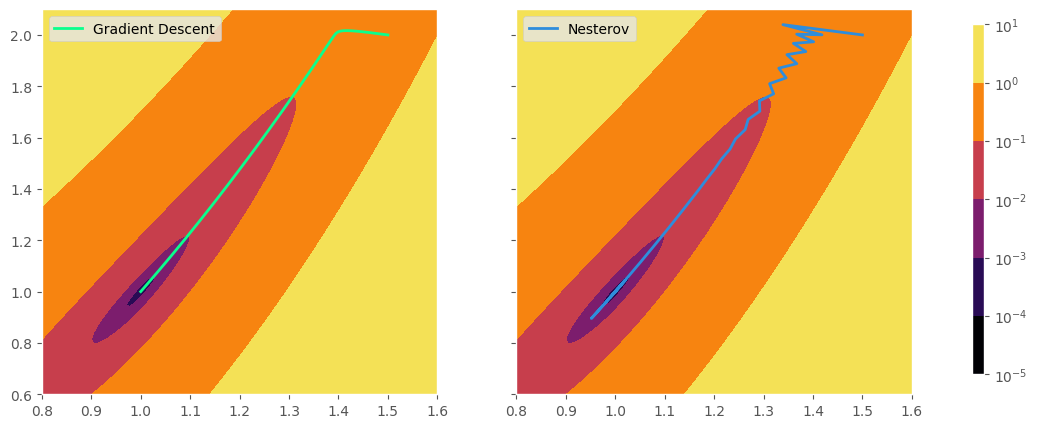

In [ ]:
from matplotlib.colors import LogNorm

X = np.linspace(0.8, 1.6, 100)
Y = np.linspace(0.6, 2.1, 100)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock([X, Y])

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

norm = LogNorm(vmin=Z.min(), vmax=Z.max())
for ax in axs:
  contours = ax.contourf(X, Y, Z, levels=100, cmap='inferno', norm=norm)

linestyling = {"linewidth":2, "linestyle":'-'}
_, _, xs, _ = gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=ALPHA_R_GD/10)
axs[0].plot(xs[:,0], xs[:,1], label='Gradient Descent', color='#0AFF8D', **linestyling)
_, _, xs, _ = nesterov_gradient_descent(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock, alpha=ALPHA_R_NES)
axs[1].plot(xs[:,0], xs[:,1], label='Nesterov', color='#2E8DDC', **linestyling)

_ = [ax.legend() for ax in axs]
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7]) # [left, bottom, width, height]
fig.colorbar(contours, cax=cbar_ax)
plt.show()

### Paso decreciente

In [ ]:
# Parte 2.d
def gradient_descent_paso_decreciente(grad, x_init, xstar, tol=1e-5):
    # Implementar el método de descenso por gradiente con paso decreciente, comenzando en x_init.
    # Consejo: revise qué tiene que cumplir el paso decreciente. Si tiene problemas de velocidad de convergencia, modifique la velocidad de caída teniendo en cuenta los requisitos vistos en clase.
    # La condición de parada debe ser que la norma del gradiente sea menor a la tolerancia establecida (tol)
    # La función debe devolver el punto x alcanzado, la cantidad de iteraciones, un array con toda la trayectoria de los x_k, y un array con las distancias de los x_k al xstar. 

    x = x_init.copy()
    xs, es = [x], [np.linalg.norm(x - xstar)]
    k = 0
    # alpha_k tiene que cumplir: alpha_k -> 0 y Sum alpha_k = inf. ej 1/k pero no 1/k^2
    # algunos, a es una constante cualquiera:
    #   a/(k+1)^p, p-series diverge si 0<p<=1, p=1 es la serie armonica
    #   a*r^k, serie geometrica diverge si |r|>=1
    #   a/np.log(k+2)

    # Gradient descent with decreasing step sizes
    while np.linalg.norm(grad(x)) > tol:
        # Update step size
        alpha = 0.3/np.log(k+2) # ESTE ANDA MUY BIEN, aprox. 400 y pico iter. con a=0.4 ya no converge 

        # Update x using the updated step size
        x -= alpha * grad(x)
        # Update iteration count and trajectory
        xs.append(x)
        es.append(np.linalg.norm(x - xstar))

        if k % 50_000 == 0:
          print(f"iter={k} norma={np.linalg.norm(grad(x)):.5f} alpha={alpha:.5f}")

        k += 1

    return x, k, np.array(xs), np.array(es)

iter=0 norma=9.71287 alpha=0.43281


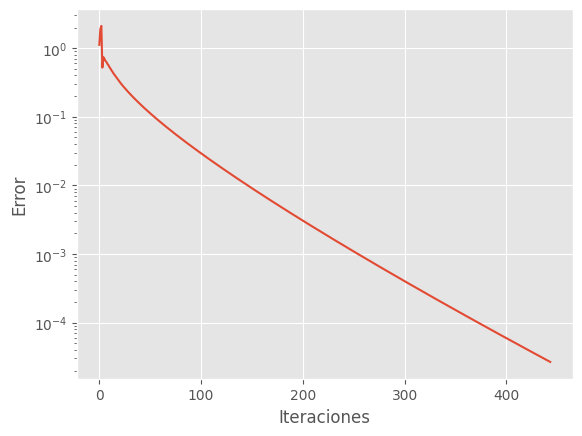

In [ ]:
x, it, xs, es = gradient_descent_paso_decreciente(grad_rosenbrock, x_init_rosenbrock, xstar_rosenbrock)

# Rosenbrock
plt.xlabel('Iteraciones')
plt.ylabel('Error') 
plt.yscale('log')
plt.plot(range(it+1), es, label='Gradient Descent')
plt.show()

In [ ]:
# Parte 2.e)
def rosenbrock_diag(x, b=2):
    # Completar
    # Debe devolver la matriz diagonal para pre-multiplicar el gradiente, según el método de diagonal scaling, para la función de Rosenbrock
    x1, x2 = x
    diag = np.zeros((2,2))
    # f(x,y) = (1-x)^2+2(y-x^2)^2
    # d^2/dx^2 f(x,y) = 12b x^2 - 4b y + 2
    # d^2/dy^2 f(x,y) = 2b
    diag[0,0] = 12 * b * x1**2 - 4 * b * x2 + 2
    diag[1,1] = 2 * b
    return np.linalg.inv(diag)


def gradient_descent_diagonal_scaling(grad, diag_scaling, x_init, xstar, alpha, tol=1e-5):
    # Implementar gradient descent con diagonal scaling y paso fijo alpha.
    # La condición de parada debe ser que la norma del gradiente sea menor a la tolerancia establecida (tol)
    # La función debe devolver el punto x alcanzado, la cantidad de iteraciones, un array con toda la trayectoria de los x_k, y un array con las distancias de los x_k al xstar. 
    
    # Inicialización
    x = x_init.copy()
    xs, es = [x_init], [np.linalg.norm(x - xstar)]
    it = 0

    # Iteraciones
    while np.linalg.norm(grad(x)) > tol:
        x -= alpha * diag_scaling(x) @ grad(x)
        # Guardar x en xs y la distancia al óptimo en es
        xs.append(x)
        es.append(np.linalg.norm(x - xstar))

        if it % 50_000 == 0:
          print(f'norma={np.linalg.norm(grad(x)):.5f}')

        it += 1

    return x, it, np.array(xs), np.array(es)

norma=2.08056


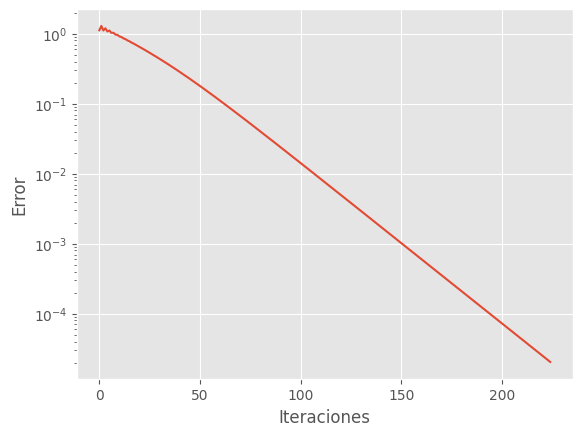

In [ ]:
x, it, xs, es = gradient_descent_diagonal_scaling(grad_rosenbrock, rosenbrock_diag, x_init_rosenbrock, xstar_rosenbrock, alpha=0.9)
# alpha>=0.007 ya demora mas o no converge
# alpha<=0.005 ya toma mas iteraciones

# Rosenbrock
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.yscale('log')
plt.plot(range(it+1), es, label='Gradient Descent')
plt.show()